# *多类型分类*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
data['X'].shape, data['y'].shape

((5000, 400), (5000, 1))

In [69]:
X, y = data['X'], data['y']
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8))

In [19]:
X.shape, y.shape


((5000, 400), (5000, 1))

In [30]:
def plot_an_image(X):
    pick_one = np.random.randint(len(X))
    image = X[pick_one, :]
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.imshow(image.reshape(20, 20).T, cmap = 'gray_r')
    plt.xticks([])
    plt.yticks([])

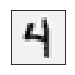

In [31]:
plot_an_image(X)

In [58]:
def plot_some_image(X, num=10):
    if num ** 2 > len(X):
        return None
    some_index = np.random.choice(len(X), num ** 2)
#     print(type(some_index))
    images = X[some_index, :]
    print(images.shape)
    fig, ax = plt.subplots(num, num, figsize=(num, num)
    , sharex=True, sharey=True
                          ) 
    for r in range(num):
        for c in range(num):
            ax[r, c].imshow(images[num * r + c].reshape(20, 20).T, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

(100, 400)


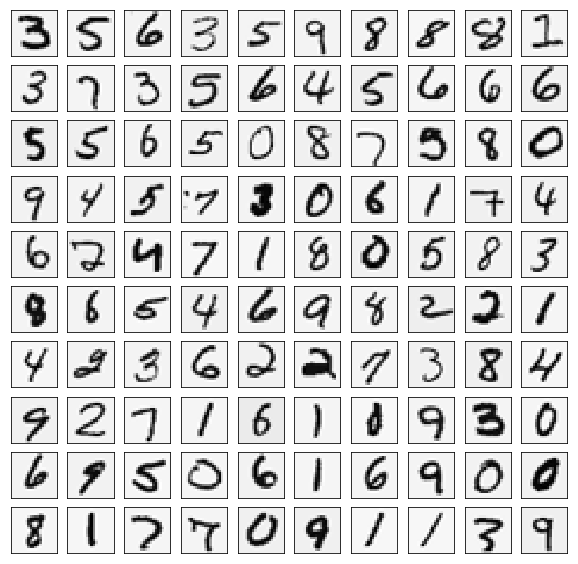

In [59]:
plot_some_image(X)

In [60]:
def sigmod(z):
    return 1 / (1 + np.exp(-z))

In [61]:
def cost_func(theta, X, y, rate):
    m = len(X)
    temp = sigmod(X @ theta)
    first = y * np.log(temp)
    second = (1 - y) * np.log(1 - temp)
    reg = theta[1:] @ theta[1:] * (rate / (2 * m))
    return -np.sum(first + second) / m + reg

In [62]:
def gradient_reg(theta, X, y, rate):
    m = len(X)
    reg = theta[1:] * (rate / m)
    reg = np.insert(reg, 0, values=0, axis=0)
    first = (X.T @ (sigmod(X @ theta) - y)) / m
    return first + reg


In [85]:
X = np.insert(X, 0, values=1, axis=1)
X.shape

(5000, 401)

In [86]:
y = y.flatten()
y.shape

(5000,)

In [74]:
from scipy.optimize import minimize


In [87]:
def one_vs_all(X, y, rate=1, k=10):
    n = X.shape[1]
#     print(n)
    theta_all = np.zeros((k, n))
    
    for i in range(1, k + 1):
        theta_i = np.zeros(n,)
        res = minimize(fun=cost_func,
                      x0=theta_i,
                      args=(X, y==i, rate),
                      method='TNC',
                      jac=gradient_reg)
        theta_all[i-1,:] = res.x
    return theta_all

In [88]:
theta_final = one_vs_all(X, y)

In [89]:
theta_final

array([[-2.38286217e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30244646e-03, -3.22642321e-10,  0.00000000e+00],
       [-3.18360635e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45712033e-03, -5.08159209e-04,  0.00000000e+00],
       [-4.79645187e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86927185e-05, -2.46719533e-07,  0.00000000e+00],
       ...,
       [-7.98732168e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94142276e-05,  7.21113217e-06,  0.00000000e+00],
       [-4.57153641e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33411557e-03,  9.98457549e-05,  0.00000000e+00],
       [-5.40460498e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16568397e-04,  7.85905605e-06,  0.00000000e+00]])

In [90]:
theta_final.shape

(10, 401)

In [91]:
def predict(X, theta_final):
    h = sigmod(X@theta_final.T) #(5000, 401) (10, 401) 
    h_argmax = np.argmax(h, axis=1)
    return h_argmax + 1

In [92]:
y_pred = predict(X, theta_final)


In [93]:
accuracy = np.mean(y_pred == y)
accuracy

0.9446